In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
%pip install seaborn
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


sns.set(font_scale=1)


In [2]:
# Now we need to read in the data
df = pd.read_csv('./data3.csv')
df = df.drop('year', axis = 1)
df['profit'] = df['profit'] / 1000000
df = df.rename(columns={'profit': 'profit(million)'})
df['budget'] = df['budget'] / 1000000
df = df.rename(columns={'budget': 'budget(million)'})

In [3]:
# Now let's take a look at the data
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget(million),gross,company,runtime,released_year,released_month,profit(million)
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.0,46998772,Warner Bros.,146,1980,June,27.998772
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5,58853106,Columbia Pictures,104,1980,July,54.353106
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.0,538375067,Lucasfilm,124,1980,June,520.375067
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.5,83453539,Paramount Pictures,88,1980,July,79.953539
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.0,39846344,Orion Pictures,98,1980,July,33.846344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90.0,426505244,Columbia Pictures,124,2020,January,336.505244
5432,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85.0,319715683,Paramount Pictures,99,2020,February,234.715683
5433,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175.0,245487753,Universal Pictures,101,2020,January,70.487753
5434,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135.0,111105497,20th Century Studios,100,2020,February,-23.894503


In [4]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget(million) - 0%
gross - 0%
company - 0%
runtime - 0%
released_year - 0%
released_month - 0%
profit(million) - 0%


In [5]:
print(df.dtypes)

name                object
rating              object
genre               object
released            object
score              float64
votes                int64
director            object
writer              object
star                object
country             object
budget(million)    float64
gross                int64
company             object
runtime              int64
released_year        int64
released_month      object
profit(million)    float64
dtype: object


<AxesSubplot:>

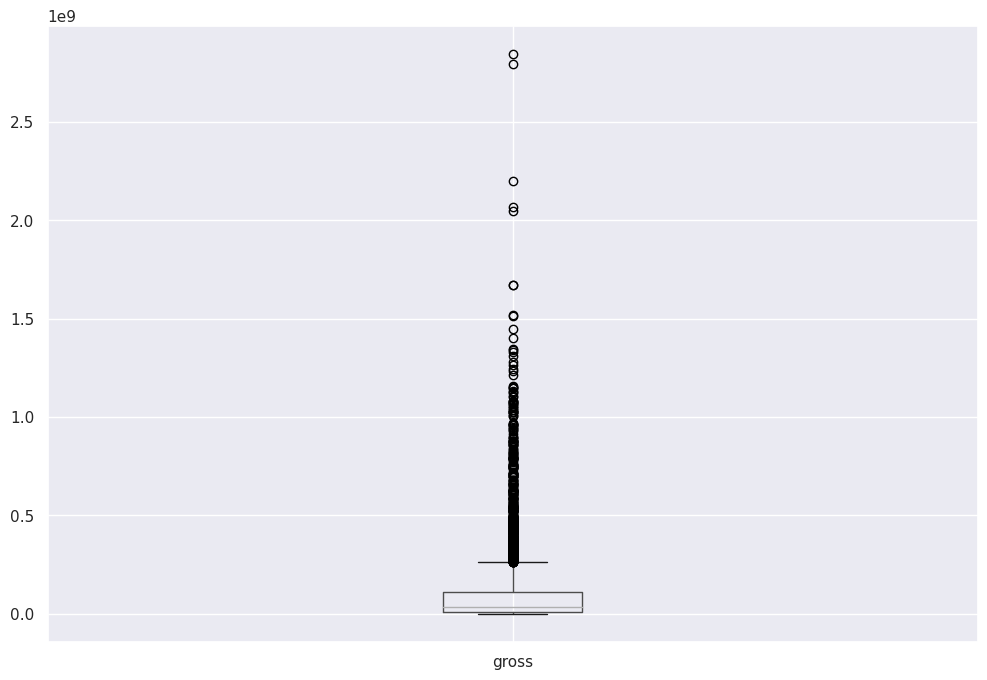

In [6]:
df.boxplot(column=['gross'])

In [7]:
df.drop_duplicates()


,name,rating,genre,released,score,votes,director,writer,star,country,budget(million),gross,company,runtime,released_year,released_month,profit(million)
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.0,46998772,Warner Bros.,146,1980,June,27.998772
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5,58853106,Columbia Pictures,104,1980,July,54.353106
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.0,538375067,Lucasfilm,124,1980,June,520.375067
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.5,83453539,Paramount Pictures,88,1980,July,79.953539
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.0,39846344,Orion Pictures,98,1980,July,33.846344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90.0,426505244,Columbia Pictures,124,2020,January,336.505244
5432,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85.0,319715683,Paramount Pictures,99,2020,February,234.715683
5433,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175.0,245487753,Universal Pictures,101,2020,January,70.487753
5434,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135.0,111105497,20th Century Studios,100,2020,February,-23.894503


In [8]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)


,name,rating,genre,released,score,votes,director,writer,star,country,budget(million),gross,company,runtime,released_year,released_month,profit(million)
3743,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237.0,2847246203,Twentieth Century Fox,162,2009,December,2610.246203
5316,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356.0,2797501328,Marvel Studios,181,2019,April,2441.501328
1802,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200.0,2201647264,Twentieth Century Fox,194,1997,December,2001.647264
4743,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245.0,2069521700,Lucasfilm,138,2015,December,1824.521700
5172,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321.0,2048359754,Marvel Studios,149,2018,April,1727.359754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5.0,2970,Trimark Pictures,97,1994,June,-4.997030
2295,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5.0,2554,Copperheart Entertainment,108,2001,May,-4.997446
154,Parasite,R,Horror,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,0.8,2270,Embassy Pictures,85,1982,March,-0.797730
1379,Madadayo,Unknown,Drama,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11.9,596,DENTSU Music And Entertainment,134,1993,April,-11.899404


<AxesSubplot:xlabel='profit(million)', ylabel='budget(million)'>

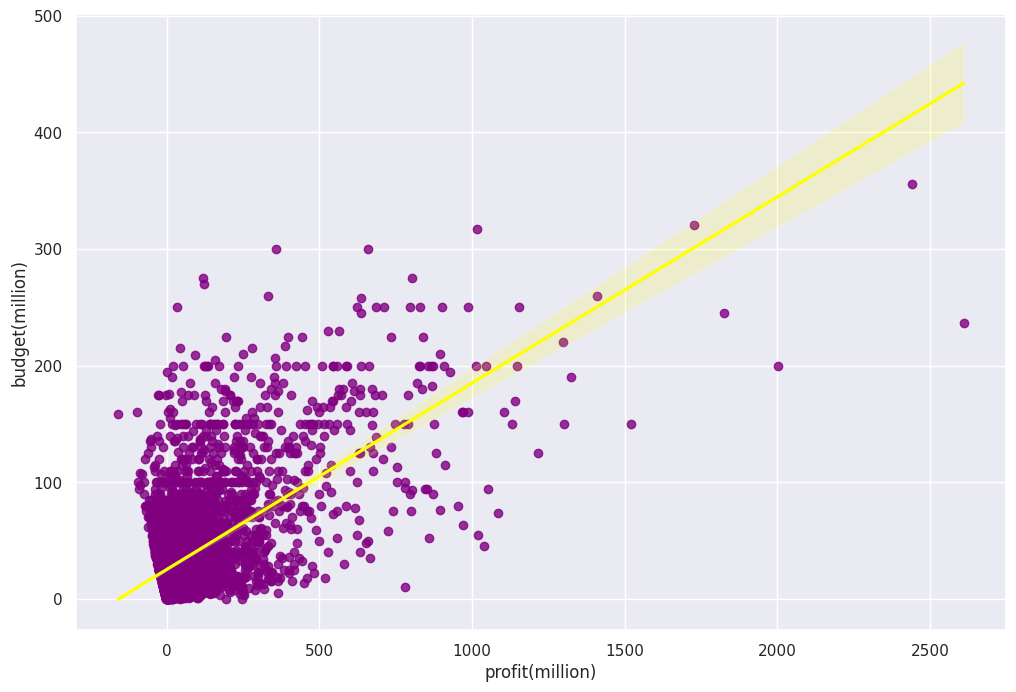

In [9]:

sns.regplot(x="profit(million)", y="budget(million)", scatter_kws={"color":"purple"}, line_kws={"color":"yellow"}, data=df)

<AxesSubplot:xlabel='profit(million)', ylabel='score'>

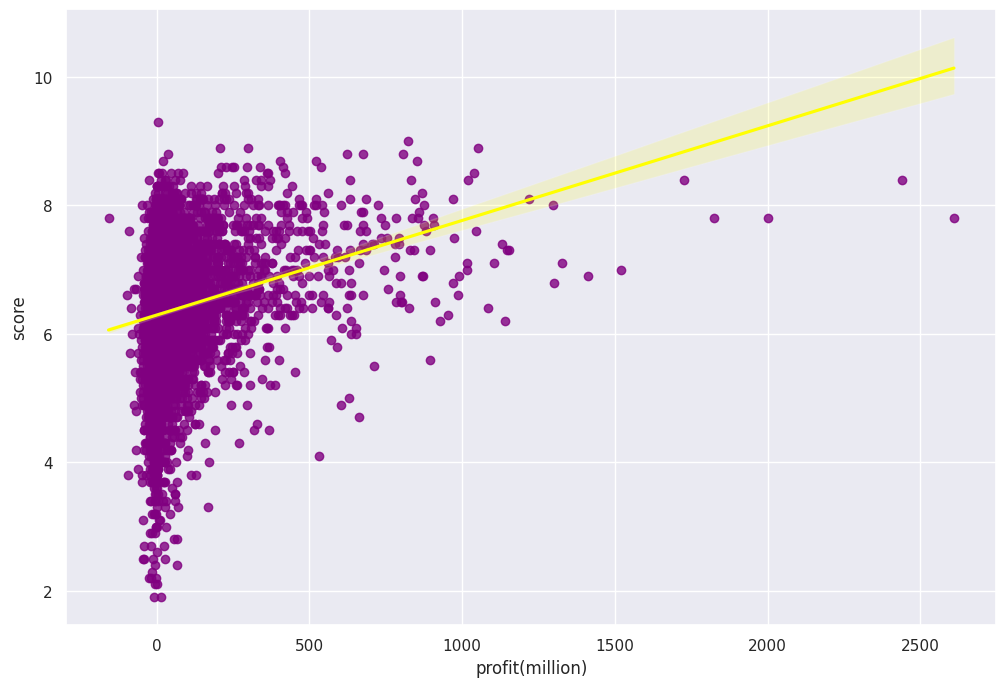

In [10]:
sns.regplot(x="profit(million)", y="score", scatter_kws={"color":"purple"}, line_kws={"color":"yellow"}, data=df)

Text(0, 0.5, 'votes(million)')

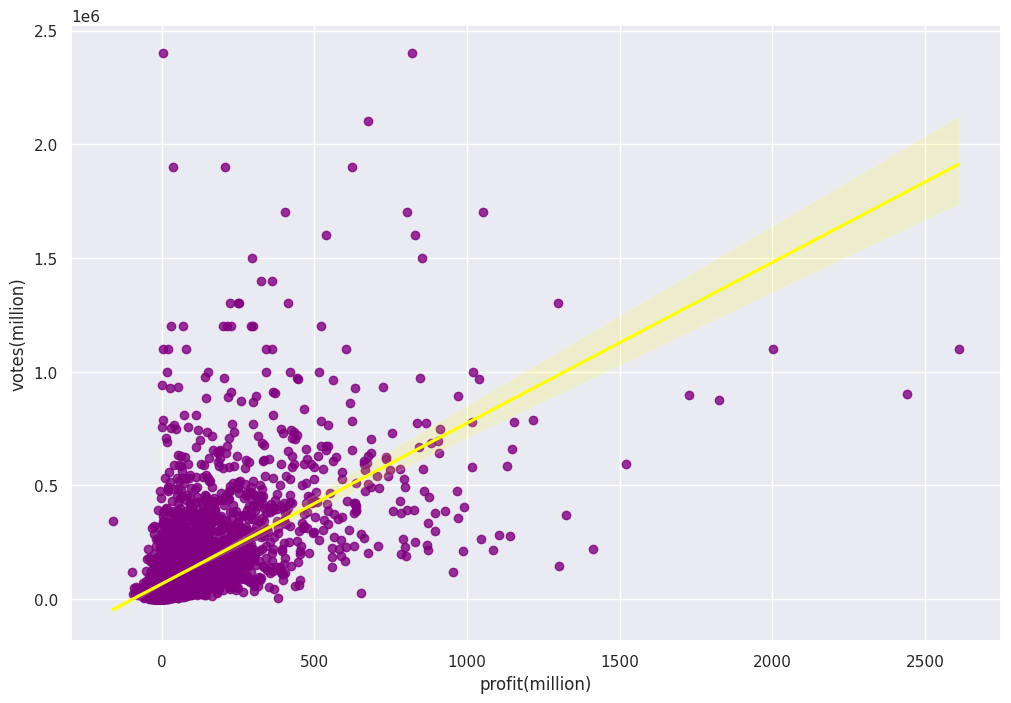

In [11]:
sns.regplot(x="profit(million)", y="votes", scatter_kws={"color":"purple"}, line_kws={"color":"yellow"}, data=df)
plt.ylabel('votes(million)')

Text(0, 0.5, 'runtime(min)')

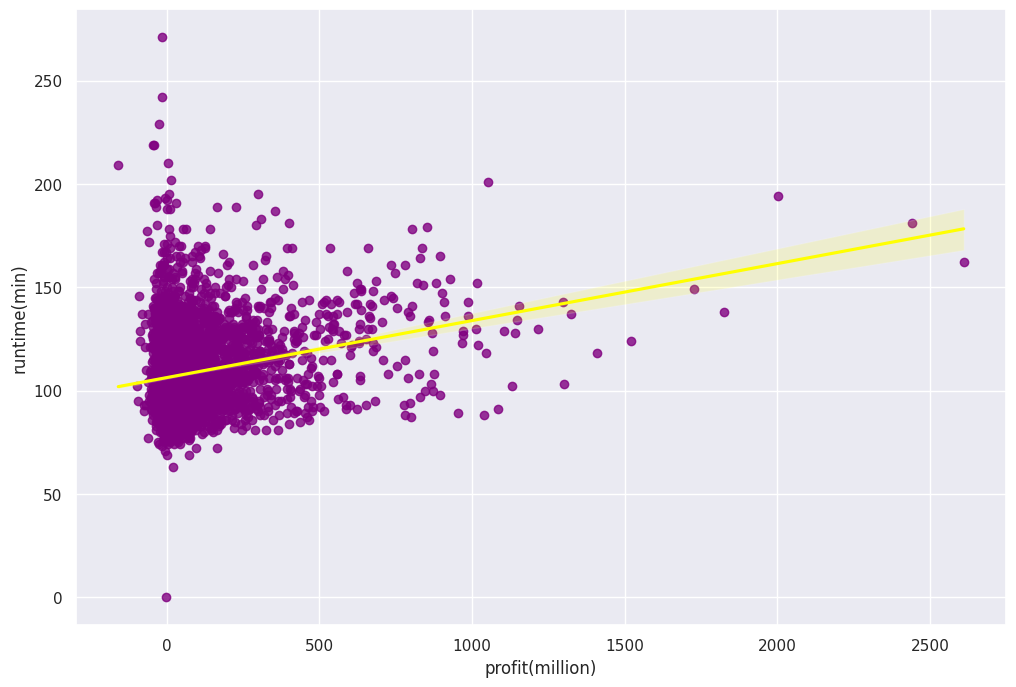

In [12]:
sns.regplot(x="profit(million)", y="runtime", scatter_kws={"color":"purple"}, line_kws={"color":"yellow"}, data=df)
plt.ylabel('runtime(min)')

<AxesSubplot:xlabel='profit(million)', ylabel='released_year'>

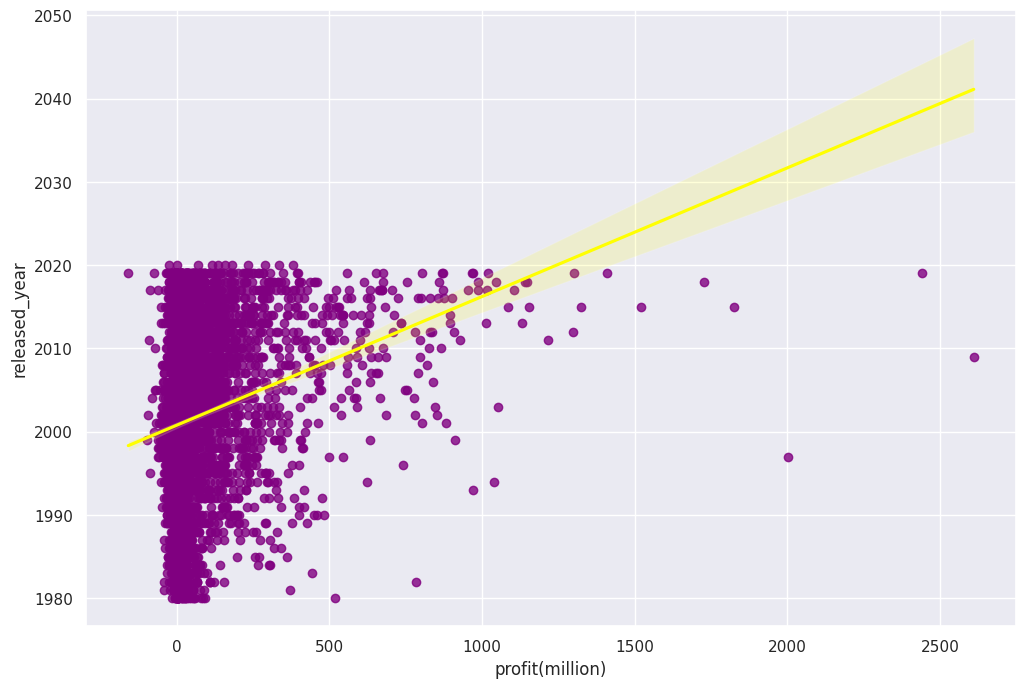

In [13]:
sns.regplot(x="profit(million)", y="released_year", scatter_kws={"color":"purple"}, line_kws={"color":"yellow"}, data=df)


<ipython-input-14-4fda5662c6bb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('genre').sum().sort_values('profit(million)', ascending=False)[:10]


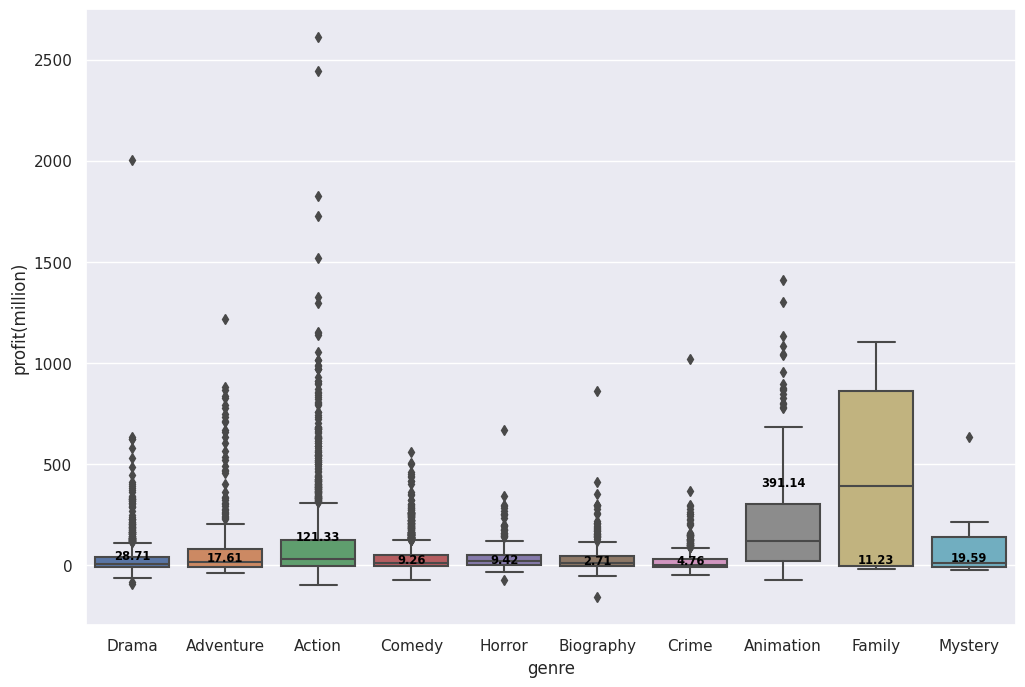

In [14]:

grouped = df.groupby('genre').sum().sort_values('profit(million)', ascending=False)[:10]

# reset index to make genre a column instead of index
grouped = grouped.reset_index()

# draw boxplot with genre on x-axis and gross on y-axis
box_plot = sns.boxplot(x='genre', y='profit(million)', data=df[df['genre'].isin(grouped['genre'])], whis=1.5, showfliers=True)
plt.ylabel('profit(million)')

medians = df.groupby(['genre'])['profit(million)'].median().round(2)
vertical_offset = df['profit(million)'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='black',weight='semibold')
    
    

<AxesSubplot:xlabel='genre', ylabel='profit(million)'>

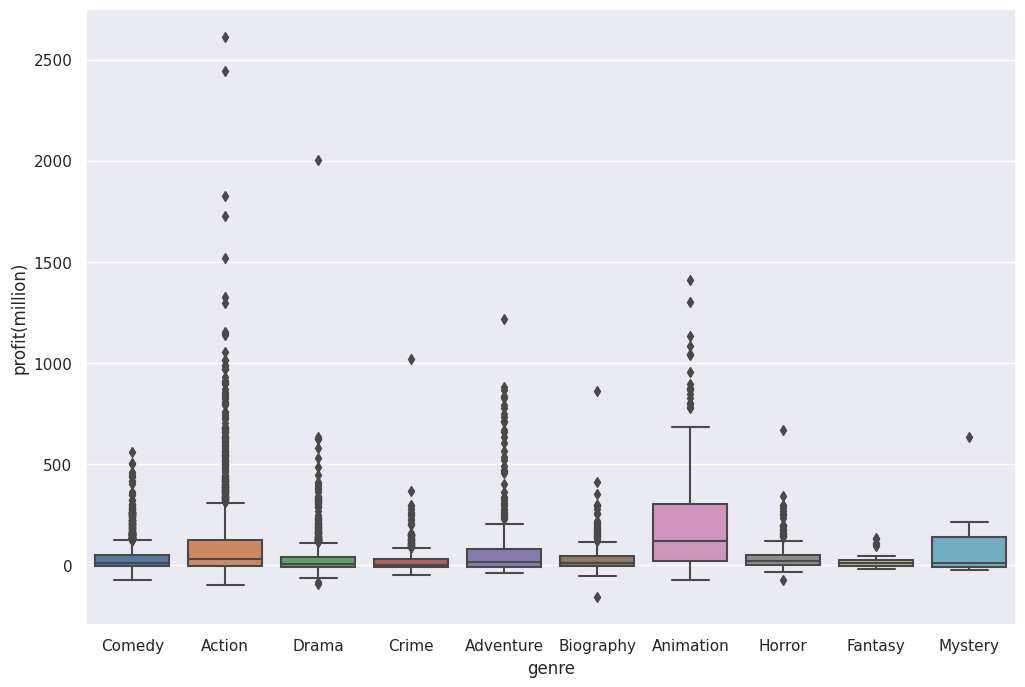

In [15]:
genre_count = df.groupby('genre').size().reset_index(name='count')

# get top 10 genres by count
top_genres = genre_count.sort_values(by='count', ascending=False).head(10)['genre']

# filter dataframe to include only top 10 genres
df_top_genres = df[df['genre'].isin(top_genres)]

# plot boxplot with profit as x-axis and genre count as y-axis
sns.boxplot(x='genre', y='profit(million)', data=df_top_genres, order=top_genres)

In [16]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

<ipython-input-16-57a4718a9002>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson')


,score,votes,budget(million),gross,runtime,released_year,profit(million)
score,1.000000,0.473809,0.071792,0.222143,0.414420,0.061029,0.242928
votes,0.473809,1.000000,0.440021,0.614904,0.351721,0.202883,0.609313
budget(million),0.071792,0.440021,1.000000,0.740395,0.317449,0.320245,0.610661
gross,0.222143,0.614904,0.740395,1.000000,0.275074,0.268626,0.984418
runtime,0.414420,0.351721,0.317449,0.275074,1.000000,0.073125,0.241021
released_year,0.061029,0.202883,0.320245,0.268626,0.073125,1.000000,0.232693
profit(million),0.242928,0.609313,0.610661,0.984418,0.241021,0.232693,1.000000


In [17]:
import scipy
df.corr(method ='kendall')

<ipython-input-17-59d0184ac92a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='kendall')


,score,votes,budget(million),gross,runtime,released_year,profit(million)
score,1.000000,0.350111,-0.006518,0.124715,0.293052,0.042612,0.180242
votes,0.350111,1.000000,0.346228,0.553640,0.205591,0.292588,0.484896
budget(million),-0.006518,0.346228,1.000000,0.512637,0.230628,0.213658,0.217159
gross,0.124715,0.553640,0.512637,1.000000,0.176754,0.232192,0.707081
runtime,0.293052,0.205591,0.230628,0.176754,1.000000,0.063878,0.096823
released_year,0.042612,0.292588,0.213658,0.232192,0.063878,1.000000,0.181504
profit(million),0.180242,0.484896,0.217159,0.707081,0.096823,0.181504,1.000000


In [18]:
df.corr(method ='spearman')


<ipython-input-18-b3d2d6ba4d44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='spearman')


,score,votes,budget(million),gross,runtime,released_year,profit(million)
score,1.000000,0.495379,-0.010133,0.182857,0.413286,0.062508,0.263012
votes,0.495379,1.000000,0.493404,0.745815,0.300940,0.422187,0.675769
budget(million),-0.010133,0.493404,1.000000,0.693670,0.329917,0.302558,0.329957
gross,0.182857,0.745815,0.693670,1.000000,0.257036,0.340211,0.865576
runtime,0.413286,0.300940,0.329917,0.257036,1.000000,0.094175,0.142862
released_year,0.062508,0.422187,0.302558,0.340211,0.094175,1.000000,0.274564
profit(million),0.263012,0.675769,0.329957,0.865576,0.142862,0.274564,1.000000


<ipython-input-19-a55504812755>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


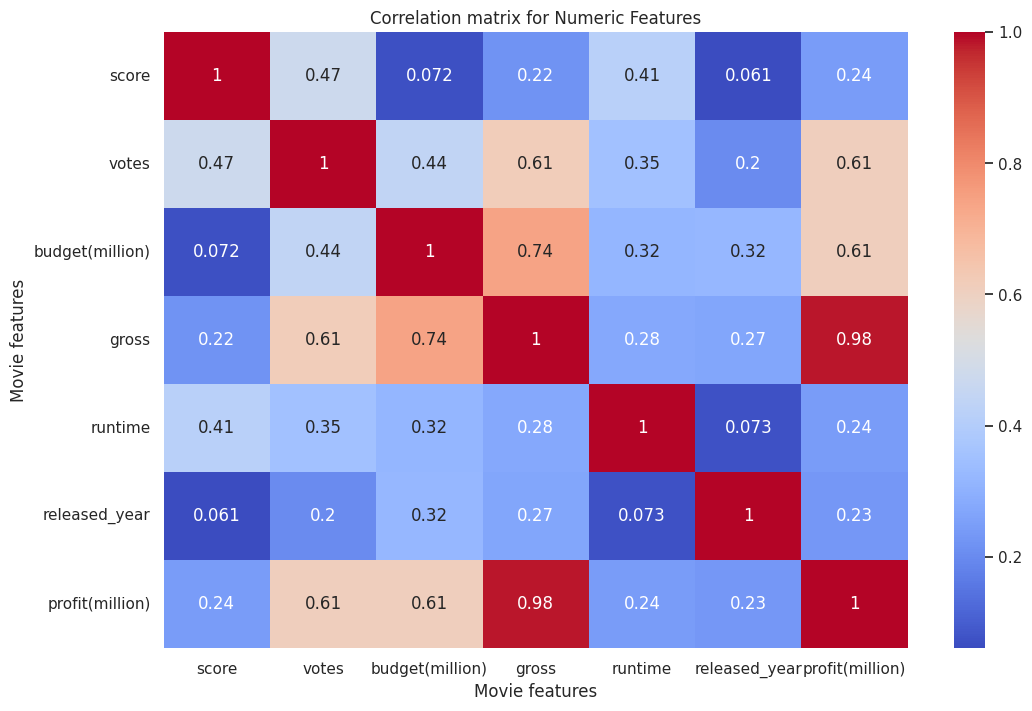

In [19]:

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [20]:
# Using factorize - this assigns a random numeric value for each unique categorical value
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,released,score,votes,director,writer,star,country,budget(million),gross,company,runtime,released_year,released_month,profit(million)
name,1.000000,0.167588,0.028171,0.966197,-0.020646,0.295174,0.725025,0.792244,0.694961,0.098449,0.288374,0.968021,0.535525,0.049844,0.915803,0.034410,0.968035
rating,0.167588,1.000000,-0.115484,0.168898,0.035287,0.093375,0.095776,0.127359,0.115268,0.001644,0.202010,0.170314,-0.024646,0.033772,0.163173,-0.031858,0.170379
genre,0.028171,-0.115484,1.000000,0.030976,-0.025599,-0.011119,0.037281,0.033239,0.045507,-0.002907,0.019690,0.031790,0.014920,-0.001371,0.031845,0.010317,0.031893
released,0.966197,0.168898,0.030976,1.000000,-0.020044,0.311206,0.750442,0.809574,0.719860,0.097169,0.309055,0.998495,0.546145,0.050387,0.939591,0.028979,0.998513
score,-0.020646,0.035287,-0.025599,-0.020044,1.000000,-0.041147,-0.006937,-0.021886,0.014536,0.016201,-0.006565,-0.016319,-0.009500,0.011308,-0.013106,0.032607,-0.016313
votes,0.295174,0.093375,-0.011119,0.311206,-0.041147,1.000000,0.186192,0.222795,0.180747,-0.021931,0.357144,0.305221,0.006941,0.126187,0.311886,-0.060291,0.305247
director,0.725025,0.095776,0.037281,0.750442,-0.006937,0.186192,1.000000,0.717746,0.636307,0.095537,0.122981,0.751338,0.483634,-0.026781,0.702654,0.038584,0.751364
writer,0.792244,0.127359,0.033239,0.809574,-0.021886,0.222795,0.717746,1.000000,0.626436,0.099294,0.206982,0.811078,0.477992,0.023605,0.774021,0.042251,0.811078
star,0.694961,0.115268,0.045507,0.719860,0.014536,0.180747,0.636307,0.626436,1.000000,0.100032,0.137562,0.720568,0.441914,0.033821,0.679683,0.047688,0.720604
country,0.098449,0.001644,-0.002907,0.097169,0.016201,-0.021931,0.095537,0.099294,0.100032,1.000000,0.015616,0.095140,0.155197,0.040570,0.085276,0.042697,0.095133


In [21]:
company = df.groupby('company').size().reset_index(name='counts')
company

,company,counts
0,"""DIA"" Productions GmbH & Co. KG",1
1,"""Weathering With You"" Film Partners",1
2,.406 Production,1
3,1492 Pictures,2
4,1818 Productions,1
...,...,...
1477,erbp,1
1478,i am OTHER,1
1479,i5 Films,1
1480,micro_scope,1


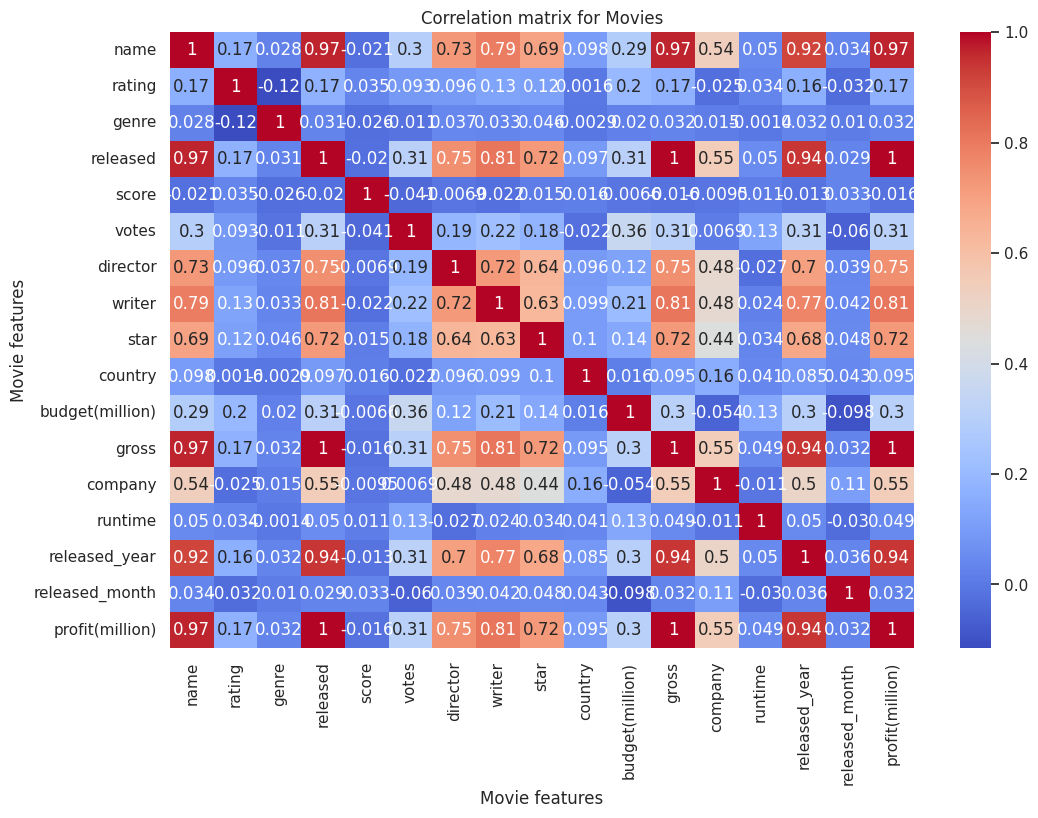

In [22]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [23]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name             name               1.000000
                 rating             0.167588
                 genre              0.028171
                 released           0.966197
                 score             -0.020646
                                      ...   
profit(million)  company            0.546053
                 runtime            0.048574
                 released_year      0.940131
                 released_month     0.031977
                 profit(million)    1.000000
Length: 289, dtype: float64


In [24]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre            rating            -0.115484
rating           genre             -0.115484
budget(million)  released_month    -0.097567
released_month   budget(million)   -0.097567
                 votes             -0.060291
                                      ...   
released         released           1.000000
genre            genre              1.000000
rating           rating             1.000000
released_month   released_month     1.000000
profit(million)  profit(million)    1.000000
Length: 289, dtype: float64


In [25]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

released_year    company            0.504627
company          released_year      0.504627
name             company            0.535525
company          name               0.535525
gross            company            0.546033
                                      ...   
released         released           1.000000
genre            genre              1.000000
rating           rating             1.000000
released_month   released_month     1.000000
profit(million)  profit(million)    1.000000
Length: 83, dtype: float64


In [26]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54773202654
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19628786232
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [27]:
df['Year'] = df['released'].astype(str).str[:4]
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget(million),gross,company,runtime,released_year,released_month,profit(million),Year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.0,46998772,Warner Bros.,146,1980,June,27.998772,June
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5,58853106,Columbia Pictures,104,1980,July,54.353106,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.0,538375067,Lucasfilm,124,1980,June,520.375067,June
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.5,83453539,Paramount Pictures,88,1980,July,79.953539,July
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.0,39846344,Orion Pictures,98,1980,July,33.846344,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90.0,426505244,Columbia Pictures,124,2020,January,336.505244,Janu
5432,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85.0,319715683,Paramount Pictures,99,2020,February,234.715683,Febr
5433,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175.0,245487753,Universal Pictures,101,2020,January,70.487753,Janu
5434,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135.0,111105497,20th Century Studios,100,2020,February,-23.894503,Febr


In [28]:
df.groupby(['company', 'released_year'])[["gross"]].sum()

gross
company                             released_year           
"DIA" Productions GmbH & Co. KG     2003            44350926
"Weathering With You" Film Partners 2020           193457467
.406 Production                     1997               10580
1492 Pictures                       1996           129832389
                                    1999            87423861
...                                                      ...
erbp                                2013              587174
i am OTHER                          2015            17986781
i5 Films                            2001            10031529
micro_scope                         2011             7099598
thefyzz                             2017            62198461

[3011 rows x 1 columns]

In [29]:
CompanyGrossSum = df.groupby(['company', 'released_year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','released_year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                released_year
Walt Disney Pictures   2019             5773131804
Marvel Studios         2018             4018631866
Universal Pictures     2015             3834354888
Twentieth Century Fox  2009             3793491246
Walt Disney Pictures   2017             3789382071
Paramount Pictures     2011             3565705182
Warner Bros.           2011             3168551343
Walt Disney Pictures   2010             3104474158
Paramount Pictures     2014             3071298586
Columbia Pictures      2019             2932757449
                       2006             2918469353
Marvel Studios         2019             2797501328
Warner Bros.           2018             2774168962
                       2005             2773019821
                       2007             2758633559
Name: gross, dtype: int64

In [30]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54773202654
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19628786232
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [31]:
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget(million),gross,company,runtime,released_year,released_month,profit(million),Year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.0,46998772,Warner Bros.,146,1980,June,27.998772,June
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5,58853106,Columbia Pictures,104,1980,July,54.353106,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.0,538375067,Lucasfilm,124,1980,June,520.375067,June
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.5,83453539,Paramount Pictures,88,1980,July,79.953539,July
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.0,39846344,Orion Pictures,98,1980,July,33.846344,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90.0,426505244,Columbia Pictures,124,2020,January,336.505244,Janu
5432,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85.0,319715683,Paramount Pictures,99,2020,February,234.715683,Febr
5433,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175.0,245487753,Universal Pictures,101,2020,January,70.487753,Janu
5434,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135.0,111105497,20th Century Studios,100,2020,February,-23.894503,Febr


In [32]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,released,score,votes,director,writer,star,country,budget(million),gross,company,runtime,released_year,released_month,profit(million),Year
0,4706,6,6,1308,8.4,927000,1800,2841,700,46,19.0,46998772,1433,146,1980,6,27.998772,11
1,3943,6,1,1131,5.8,65000,1581,1160,215,47,4.5,58853106,454,104,1980,5,54.353106,10
2,3654,4,0,1363,8.7,1200000,759,1822,1161,47,18.0,538375067,949,124,1980,6,520.375067,11
3,205,4,4,1131,7.7,221000,891,1416,1478,47,3.5,83453539,1114,88,1980,5,79.953539,10
4,734,6,4,1174,7.3,108000,721,352,272,47,6.0,39846344,1089,98,1980,5,33.846344,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,416,6,0,907,6.6,140000,17,2397,1819,47,90.0,426505244,454,124,2020,4,336.505244,9
5432,3569,4,0,715,6.5,102000,854,2316,148,47,85.0,319715683,1114,99,2020,3,234.715683,8
5433,1156,4,1,907,5.6,53000,1814,2836,1474,47,175.0,245487753,1403,101,2020,4,70.487753,9
5434,3992,4,1,760,6.8,42000,296,2096,641,6,135.0,111105497,12,100,2020,3,-23.894503,8


<AxesSubplot:xlabel='profit(million)', ylabel='rating'>

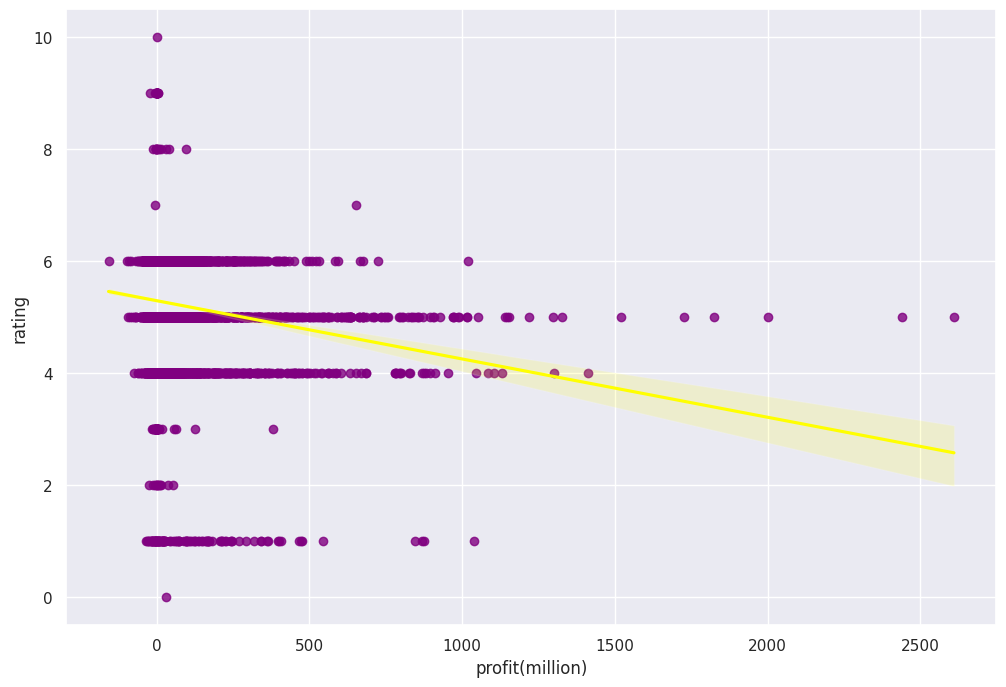

In [33]:
sns.regplot(x="profit(million)", y="rating", scatter_kws={"color":"purple"}, line_kws={"color":"yellow"}, data=df)

In [34]:
from scipy import stats

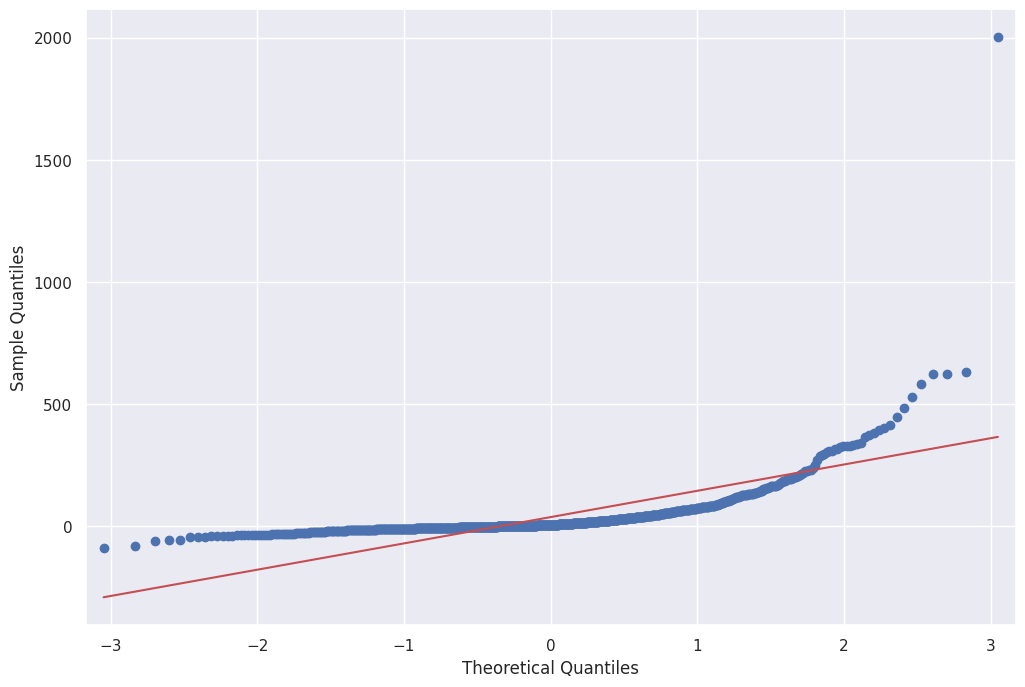

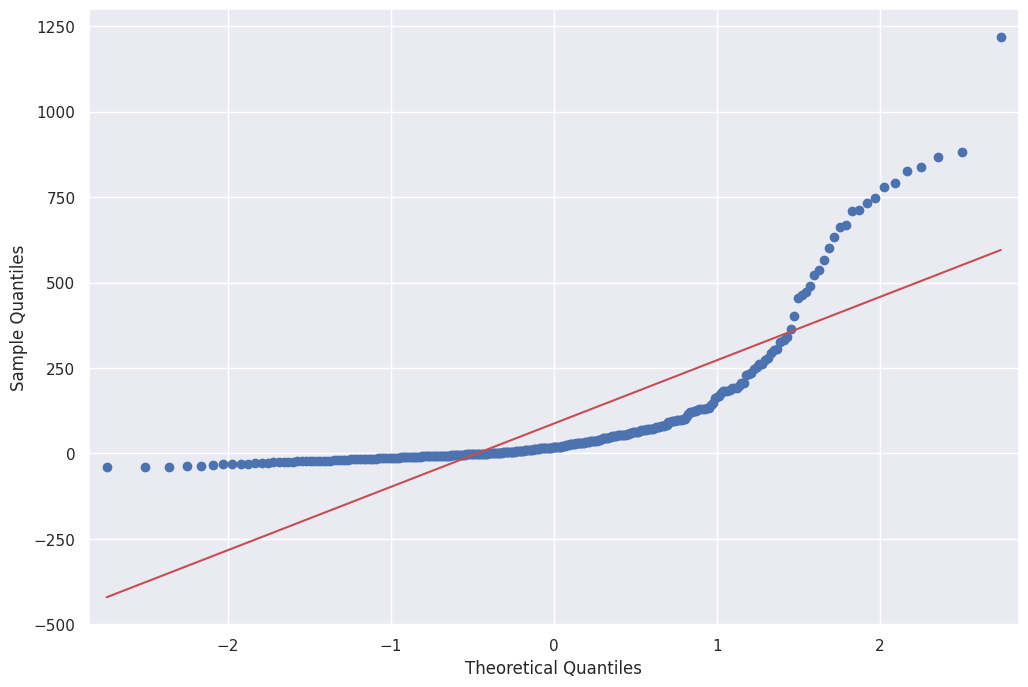

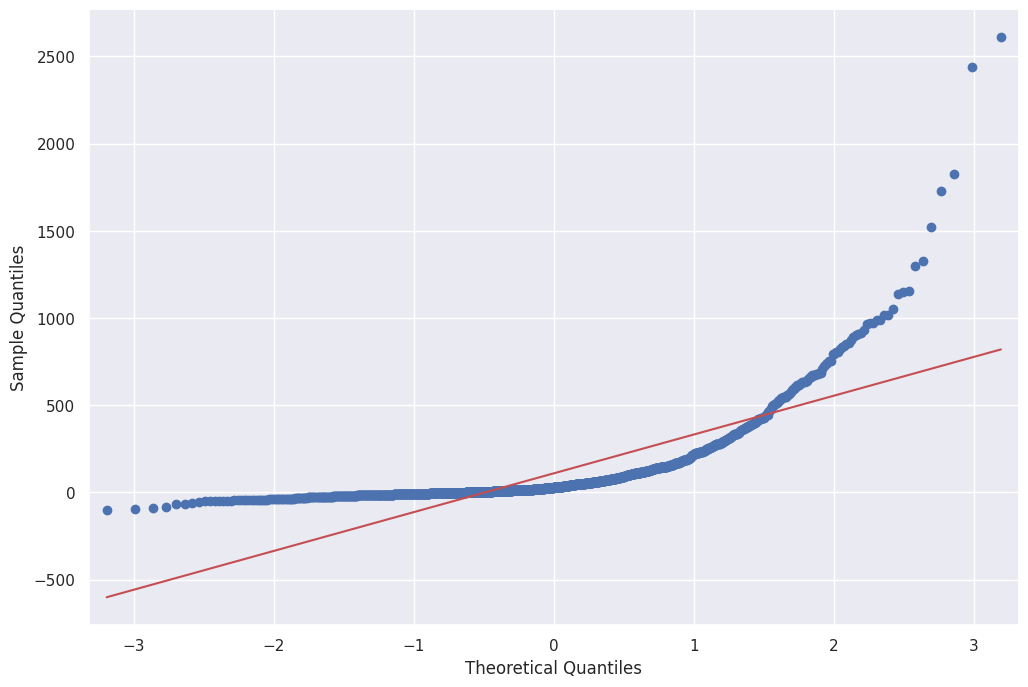

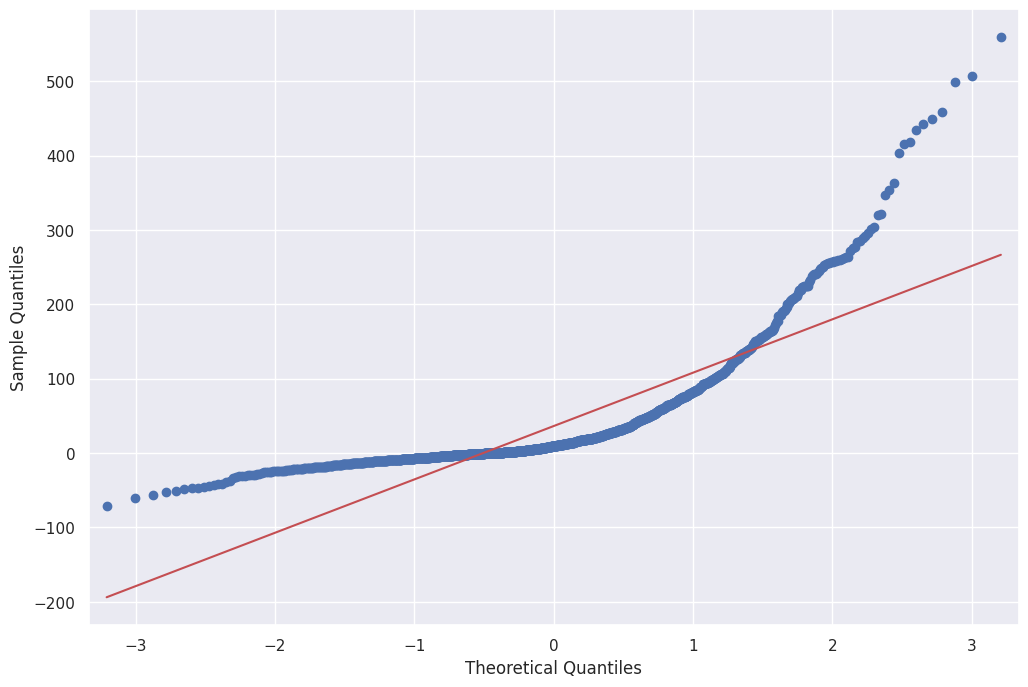

In [35]:
#for drama
from statsmodels.graphics.gofplots import qqplot
dfqq6 = df_numerized[df_numerized['genre'] == 6]
p1 = qqplot(dfqq6['profit(million)'], line='s')

# for adventure
dfqq1 = df_numerized[df_numerized['genre'] == 1]
p2 = qqplot(dfqq1['profit(million)'], line='s')

# action

dfqq0 = df_numerized[df_numerized['genre'] == 0]
p3 = qqplot(dfqq0['profit(million)'], line='s')

# comedy
dfqq4 = df_numerized[df_numerized['genre'] == 4]
p4 = qqplot(dfqq4['profit(million)'], line='s')

# fig, axes = plt.subplots(2, 2, figsize=(15, 15))
# stats.probplot(dfqq4, plot=axes[0,0])
# stats.probplot(p2, plot=axes[0,1])
# stats.probplot(p3, plot=axes[1,0])
# stats.probplot(p3, plot=axes[1,1])
# plt.show()

In [36]:
df_log = df_numerized.copy()  # make a copy of the original dataframe
df_log[['profit(million)', 'budget(million)', 'gross']] = np.log(df_numerized[['profit(million)', 'budget(million)', 'gross']]+ 70)


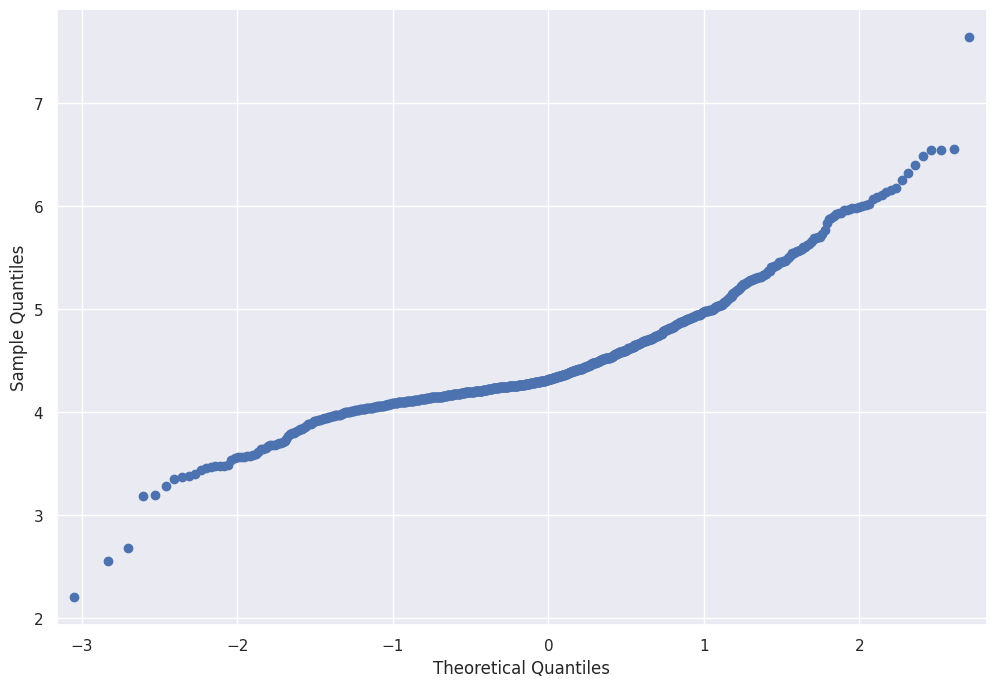

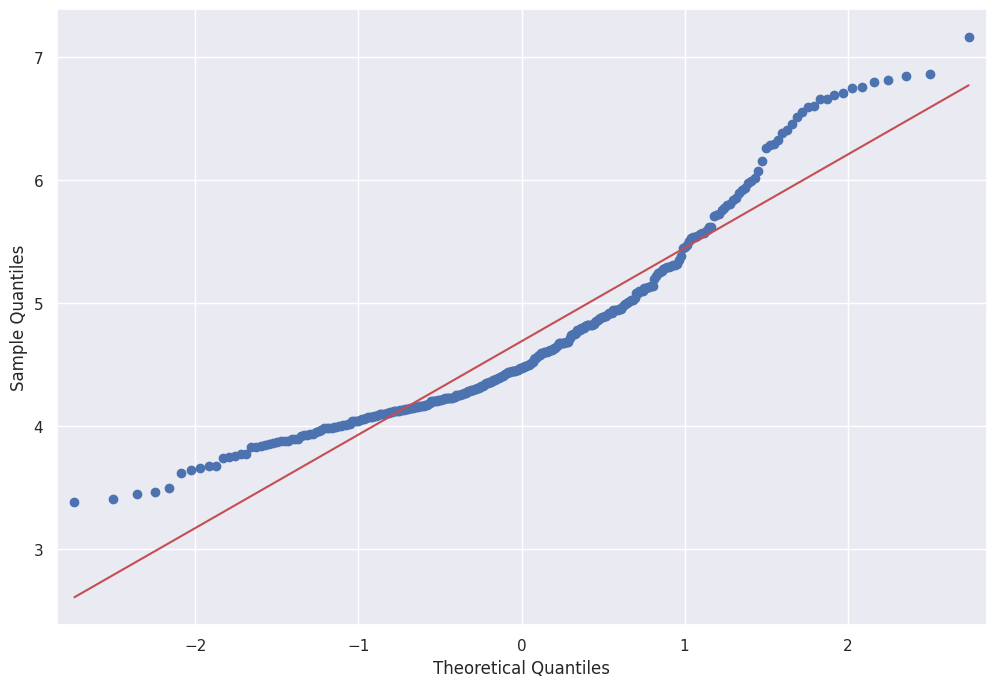

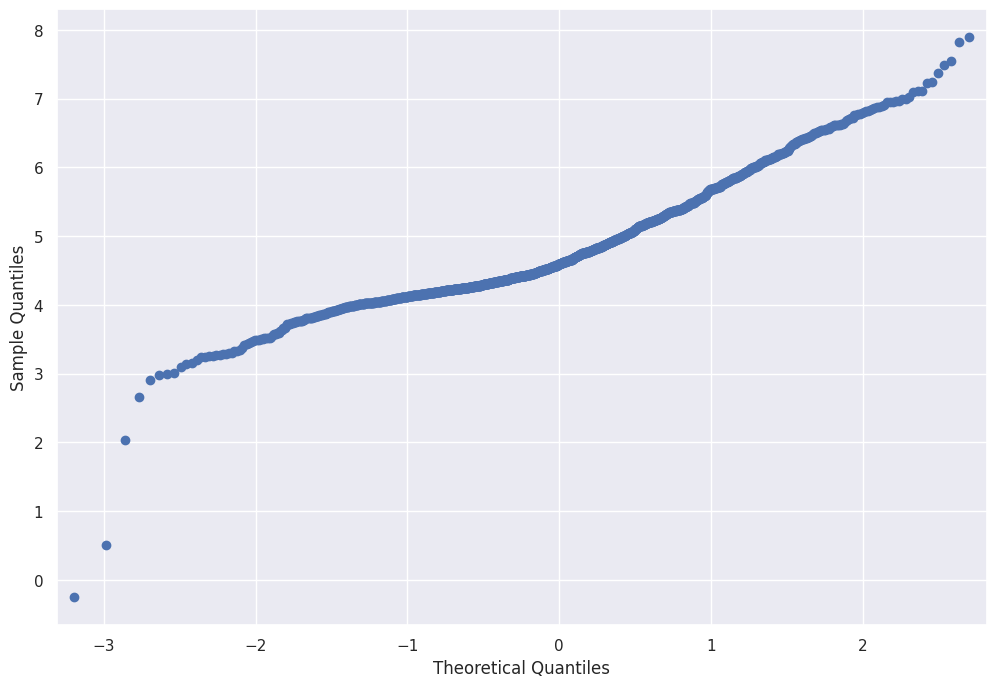

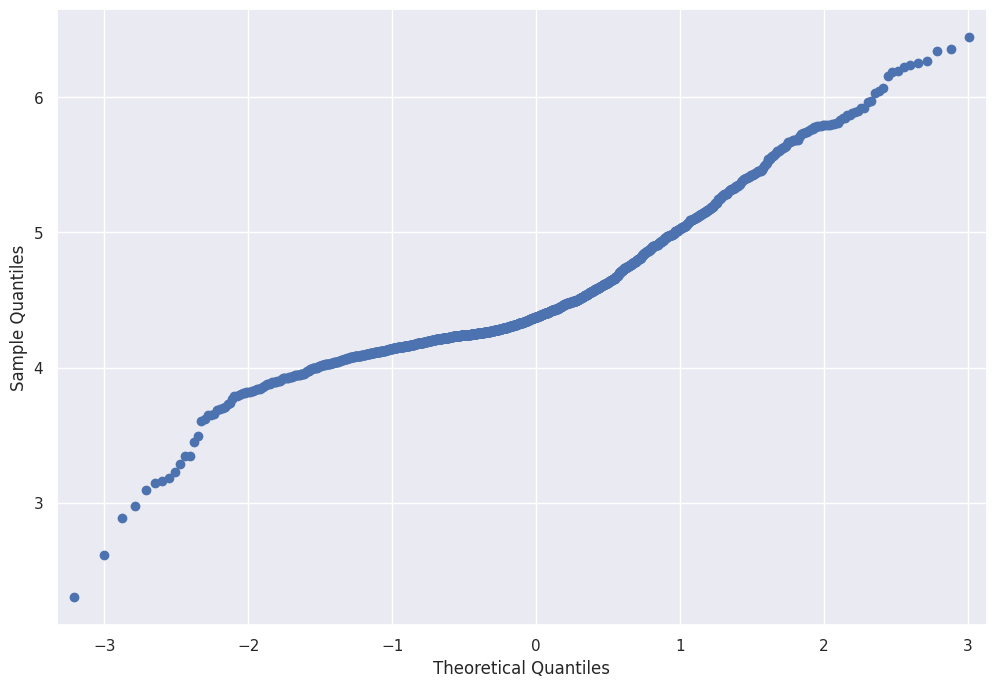

In [37]:
dfqq6 = df_log[df_log['genre'] == 6]
p1 = qqplot(dfqq6['profit(million)'], line='s')

# for adventure
dfqq1 = df_log[df_log['genre'] == 1]
p2 = qqplot(dfqq1['profit(million)'], line='s')

# action

dfqq0 = df_log[df_log['genre'] == 0]
p3 = qqplot(dfqq0['profit(million)'], line='s')

# comedy
dfqq4 = df_log[df_log['genre'] == 4]
p4 = qqplot(dfqq4['profit(million)'], line='s')

In [38]:
df1 = df[['genre','votes','runtime','released_year','released_month']]
df1 = df1.loc[df1['genre'].isin([0, 4,5, 6])]

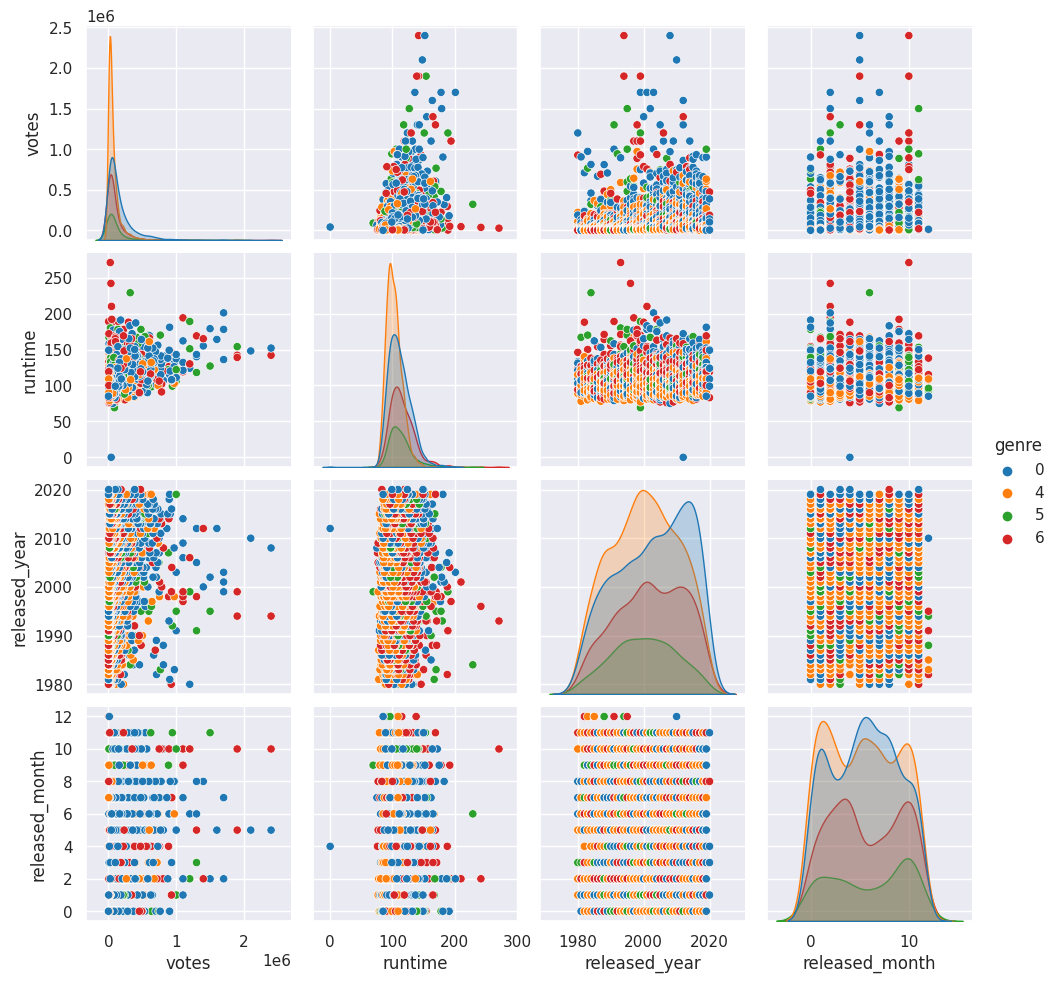

In [39]:
sns.pairplot(df1, palette = 'tab10', hue= 'genre')

In [40]:
# onehot 

In [41]:
Rate = df.groupby('rating').size().reset_index(name='counts')
Rate

,rating,counts
0,0,1
1,1,111
2,2,12
3,3,44
4,4,909
5,5,1730
6,6,2597
7,7,2
8,8,12
9,9,17


In [42]:
company = df.groupby('company').size().reset_index(name='counts')
company.describe()

,company,counts
count,1482.000000,1482.000000
mean,740.500000,3.668016
std,427.960863,18.471407
min,0.000000,1.000000
25%,370.250000,1.000000
50%,740.500000,1.000000
75%,1110.750000,2.000000
max,1481.000000,330.000000


In [43]:
genre = df.groupby('genre').size().reset_index(name='counts')
genre

,genre,counts
0,0,1417
1,1,327
2,2,278
3,3,312
4,4,1496
5,5,400
6,6,869
7,7,4
8,8,42
9,9,254


In [44]:

df_numerized.corr(method='pearson')

,name,rating,genre,released,score,votes,director,writer,star,country,budget(million),gross,company,runtime,released_year,released_month,profit(million),Year
name,1.000000,-0.029987,0.009617,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.025562,0.023698,0.005966,0.021347,0.010636,0.024734,-0.008047,0.000829,-0.007216
rating,-0.029987,1.000000,0.152486,0.017126,0.068304,0.003942,0.014081,-0.000861,0.011267,0.003657,-0.205920,-0.182403,-0.095558,0.137020,0.019748,0.017355,-0.161021,0.014582
genre,0.009617,0.152486,1.000000,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.008974,-0.368900,-0.244380,-0.072835,-0.058595,-0.068848,0.027414,-0.191399,0.021016
released,-0.005896,0.017126,0.021712,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017215,0.019888,0.008614,-0.002689,0.009054,-0.005625,0.988481,0.004945,0.996190
score,0.014955,0.068304,0.034061,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.045209,0.071792,0.222143,0.020168,0.414420,0.061029,0.043122,0.242928,0.045603
votes,0.012915,0.003942,-0.136457,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.041655,0.440021,0.614904,0.118731,0.351721,0.202883,0.023974,0.609313,0.027719
director,0.013699,0.014081,-0.009303,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011961,-0.009340,-0.029366,-0.006616,0.018004,-0.036281,0.004286,-0.032153,0.004565
writer,0.011602,-0.000861,0.017500,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022866,-0.039420,-0.035999,-0.003289,-0.018018,-0.024397,0.008788,-0.032098,0.008114
star,-0.007109,0.011267,0.002619,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.011677,-0.021282,-0.000009,0.013716,0.012308,-0.033168,0.012875,0.005556,0.014537
country,-0.025562,0.003657,-0.008974,-0.017215,-0.045209,0.041655,0.011961,0.022866,-0.011677,1.000000,0.053722,0.060517,0.049666,-0.035380,-0.072564,-0.017100,0.057241,-0.016841


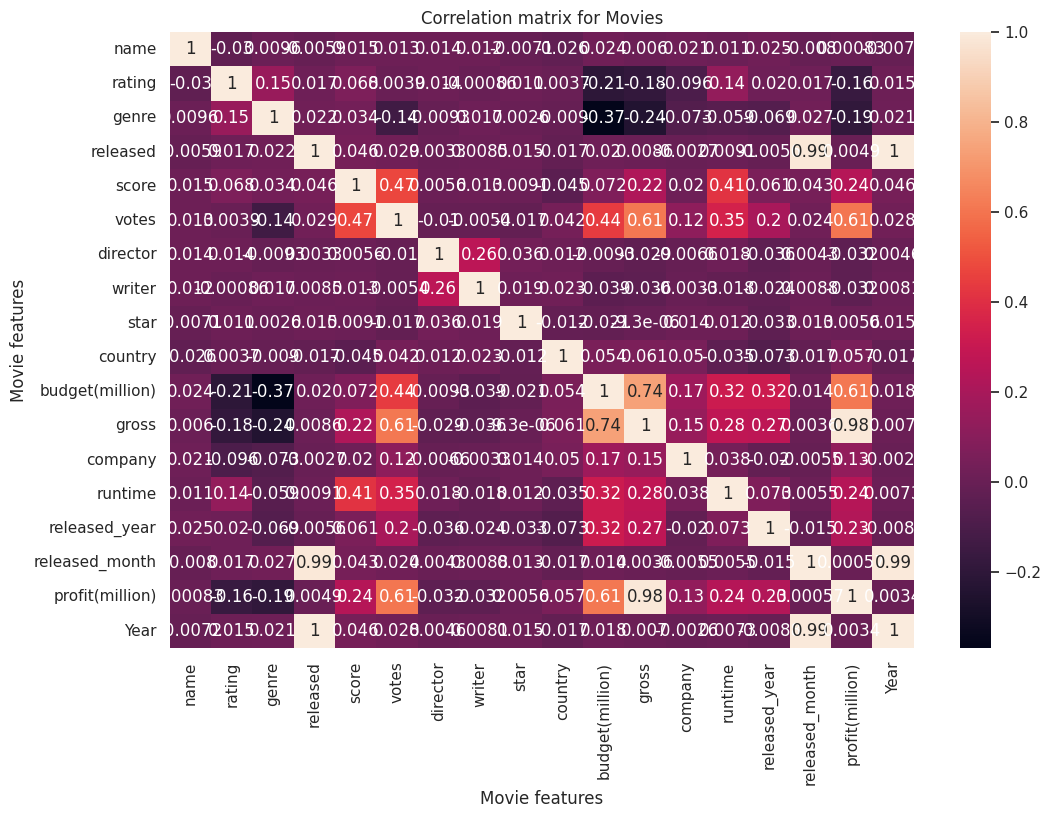

In [45]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [46]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(x1 = df['profit(million)'], x2 = df['budget(million)'], value = 0, alternative='two-sided', usevar='pooled', ddof=1.0)
print(float(pval), ztest)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.0669147940557984e-44 13.97992990788851
reject null hypothesis
